**0. Introduction**\
We aim to answer two main questions:
\
    - How has actor diversity evolved over time based on attributes such as gender, ethnicity, height, and age at the time of a movie’s release, and what trends in diversity can be observed across different countries?
\
    - How have stereotypical roles or archetypes in films changed over time, and how are specific attributes (e.g., gender, ethnicity) linked to character roles? Furthermore, have these patterns shifted over time and across different cultures?\
    \


**1. Preprocessing**

Preprocessing de Lou, Yoyo et Antea

For the second question, the main issue was that the dataset tvtropes_clusters.csv contained only 502 lines, which was too small to be used effectively for analyzing roles or archetypes. As a result, we needed to obtain new data that would include such roles or archetypes.

To achieve this, we used the SPARQL endpoint API of Wikidata. By using Python code, we were able to send a SPARQL query that contained a Freebase ID for each character. This allowed us to obtain detailed information related to each character, including their associated occupations.

We collected the new data and stored it in a dataset called extract_data.csv, which included a new column named "Occupation Labels". This column contained a list of occupations related to each character. For example, Batman had multiple occupations, such as businessman, superhero, and more.

Finally, this new dataset was cleaned and processed using similar methods as for the first question. The data was normalized, duplicates were removed, and missing values were handled, resulting in a more complete and structured dataset for further analysis.

**2. Exploratory Data Analysis**

Lou,Antea,Yoyo

Maurice

Results of the archetype analysis:

Gender in different archetypes:


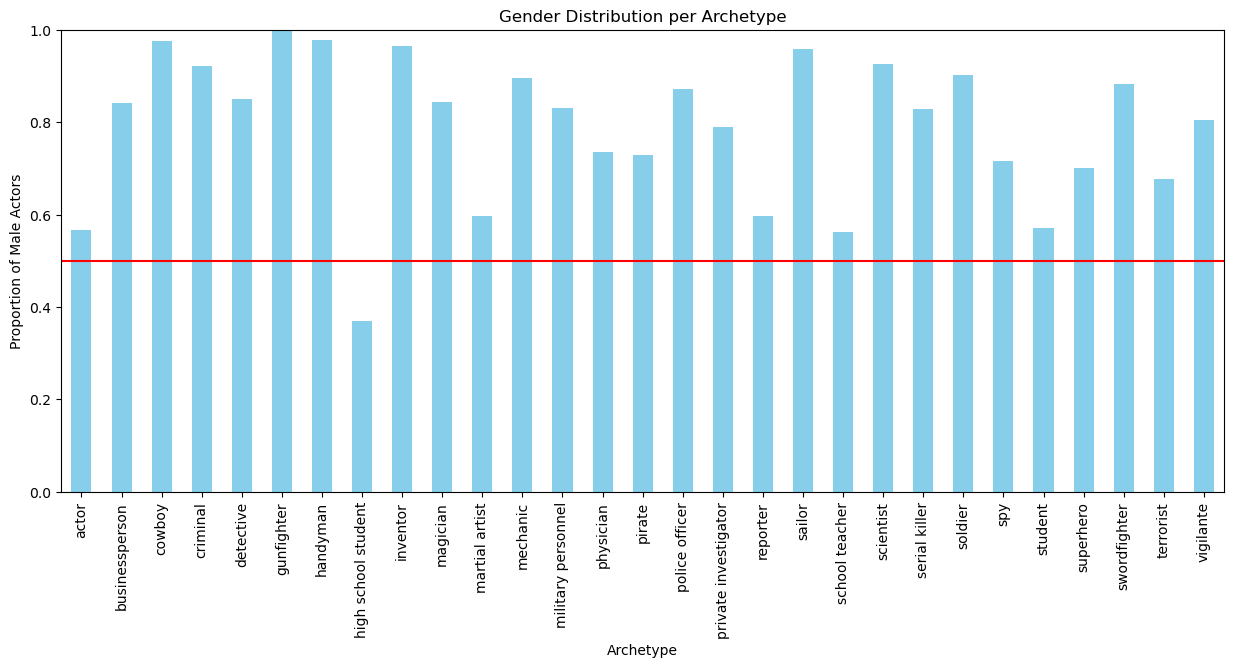

Gender statistics:
Chi-square test statistic: 1597.931753249202
p-value: 0.0
Degrees of freedom: 29
There is a statistically significant gender bias by archetype (reject null hypothesis).

Height in different archetypes:


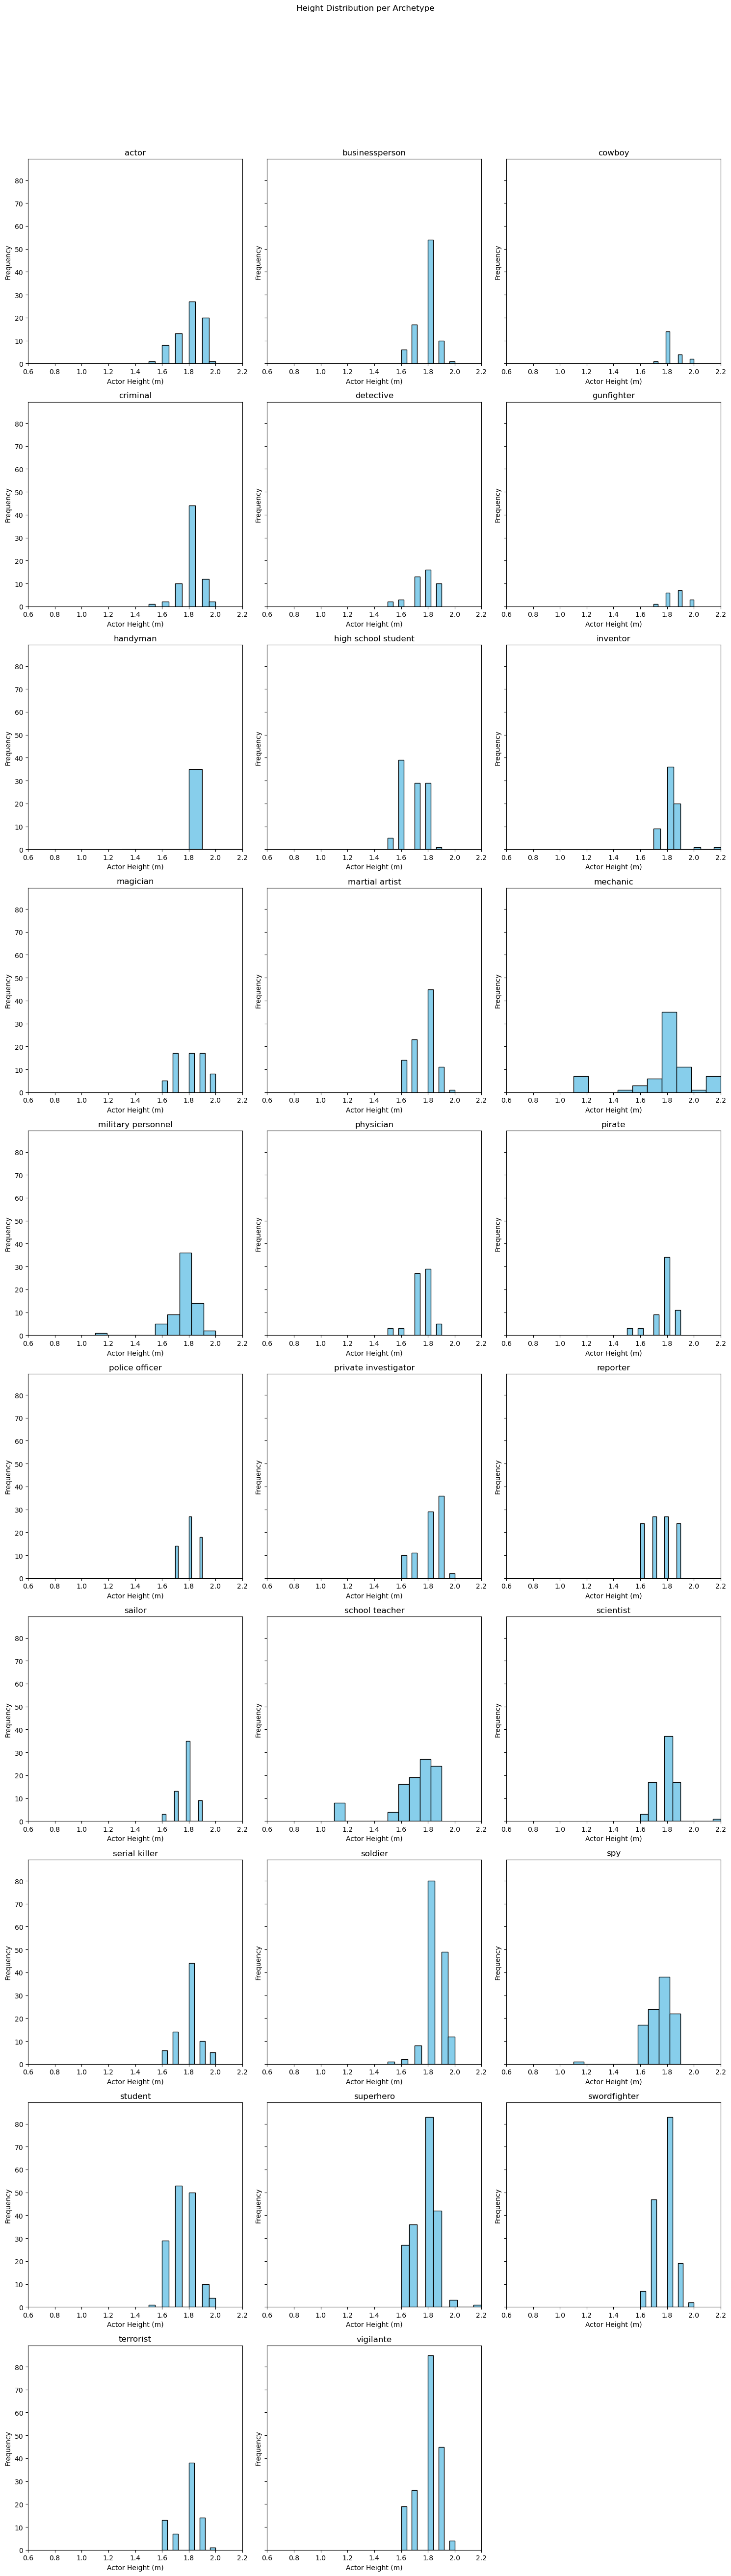

Height statistics:
Chi-square test statistic: 997.7845270353575
p-value: 1.4157778069604968e-107
Degrees of freedom: 196
There is a statistically significant height bias by archetype (reject null hypothesis).

Age in different archetypes:


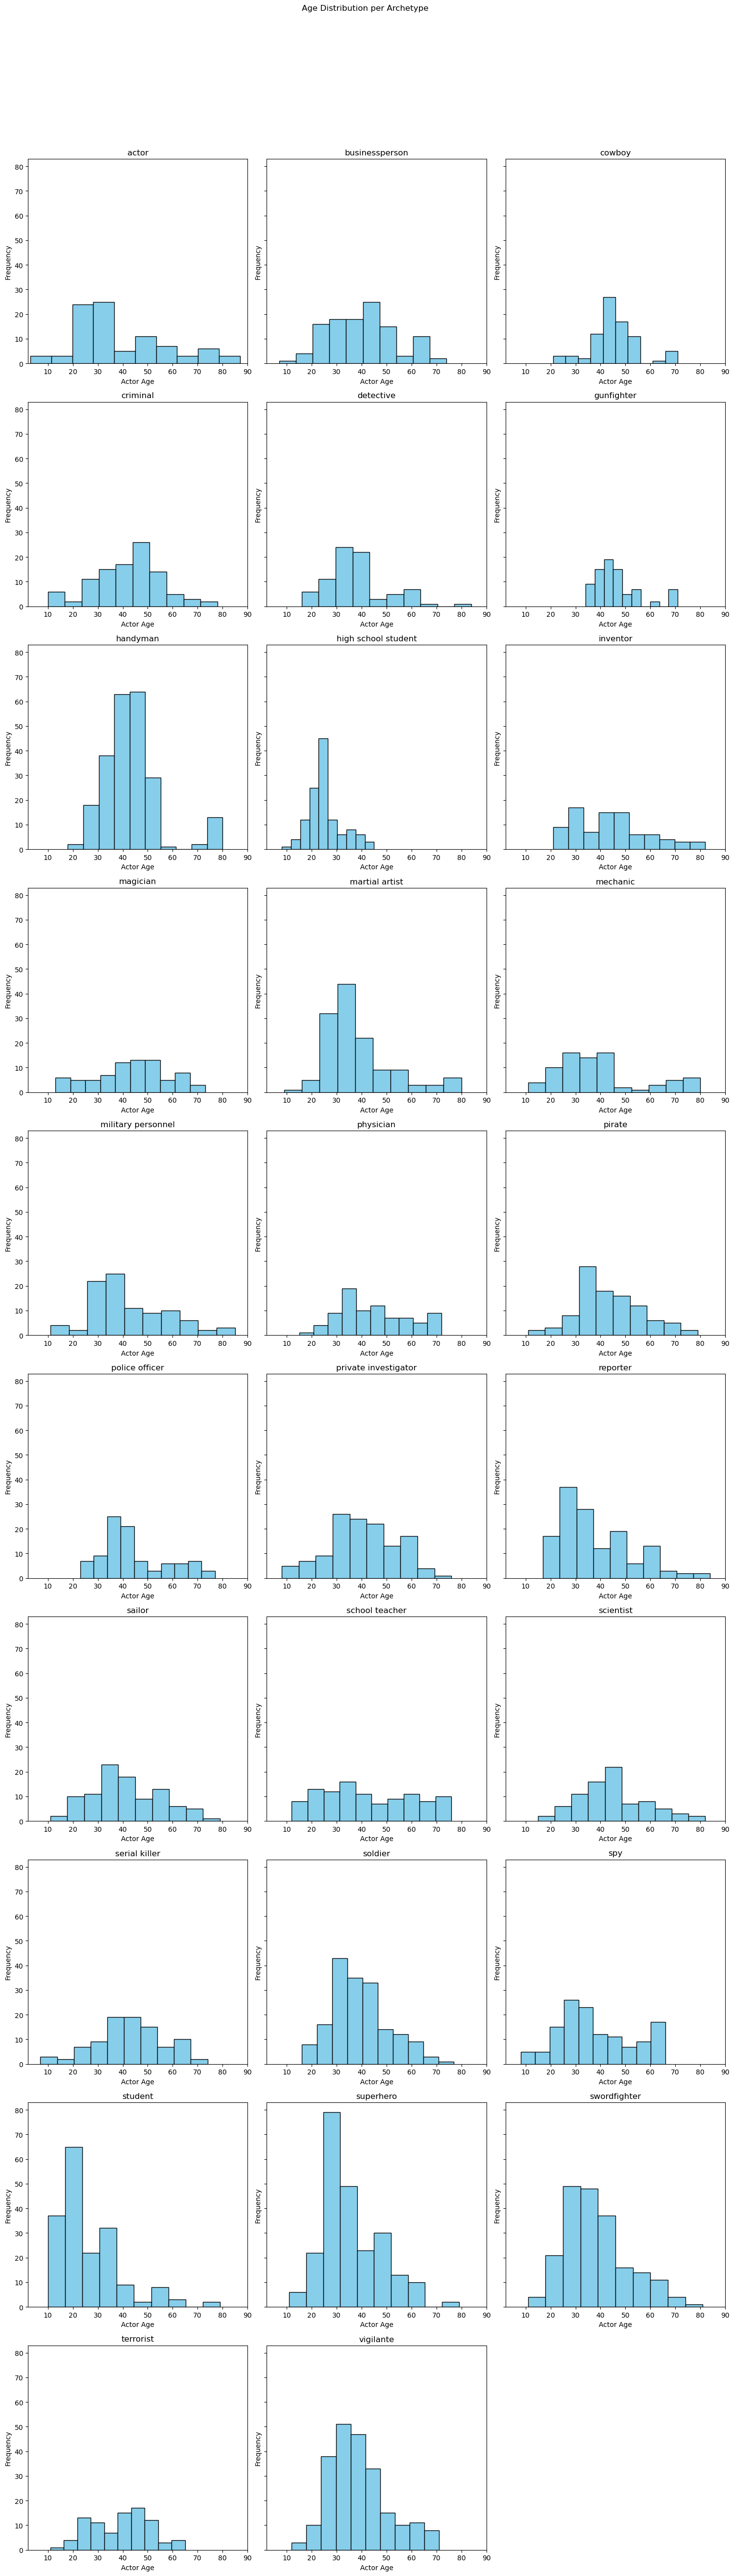

Age statistics:
Chi-square test statistic: 4045.5049115226216
p-value: 4.3663214469626895e-107
Degrees of freedom: 2240
There is a statistically significant age bias by archetype (reject null hypothesis).

Country of origin in different archetypes:


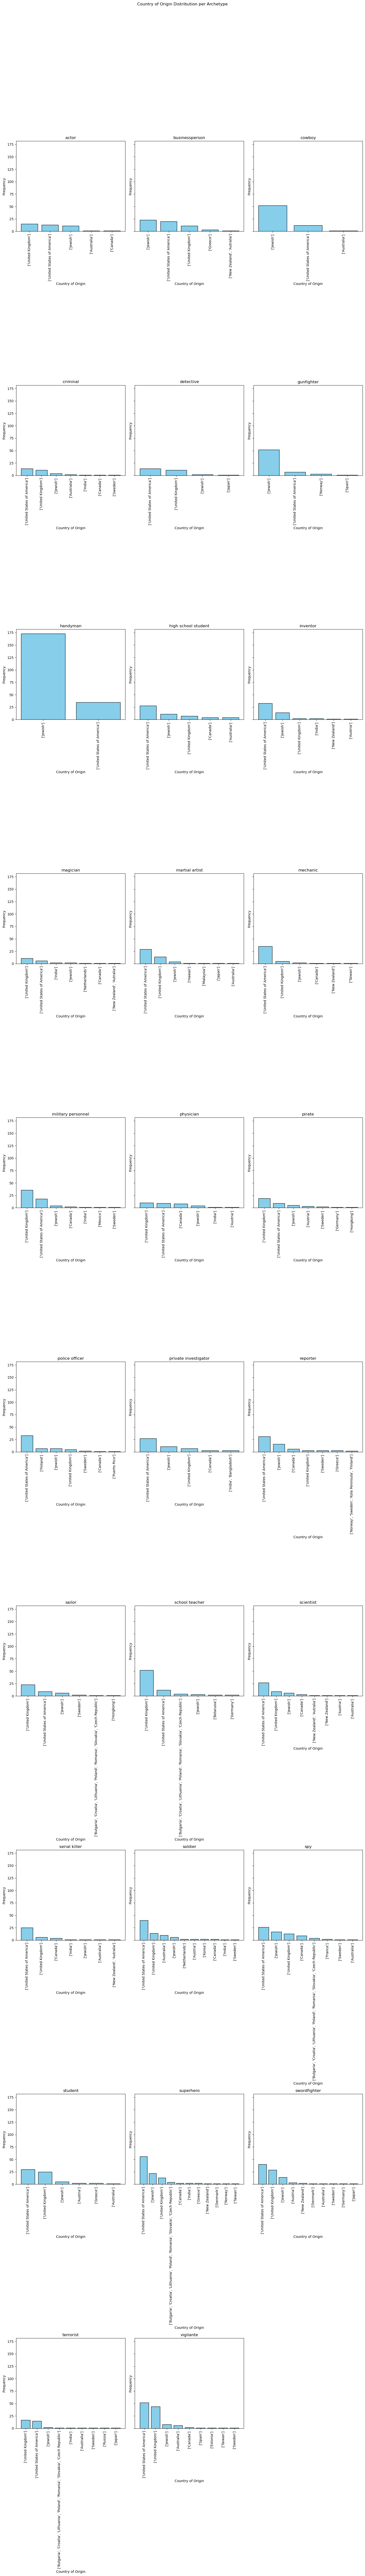

Country of origin statistics
Chi-square test statistic: 2504.016483800885
p-value: 2.7574988985221674e-158
Degrees of freedom: 868
There is a statistically significant country of origin by archetype (reject null hypothesis).

Ethnicity in different archetypes:


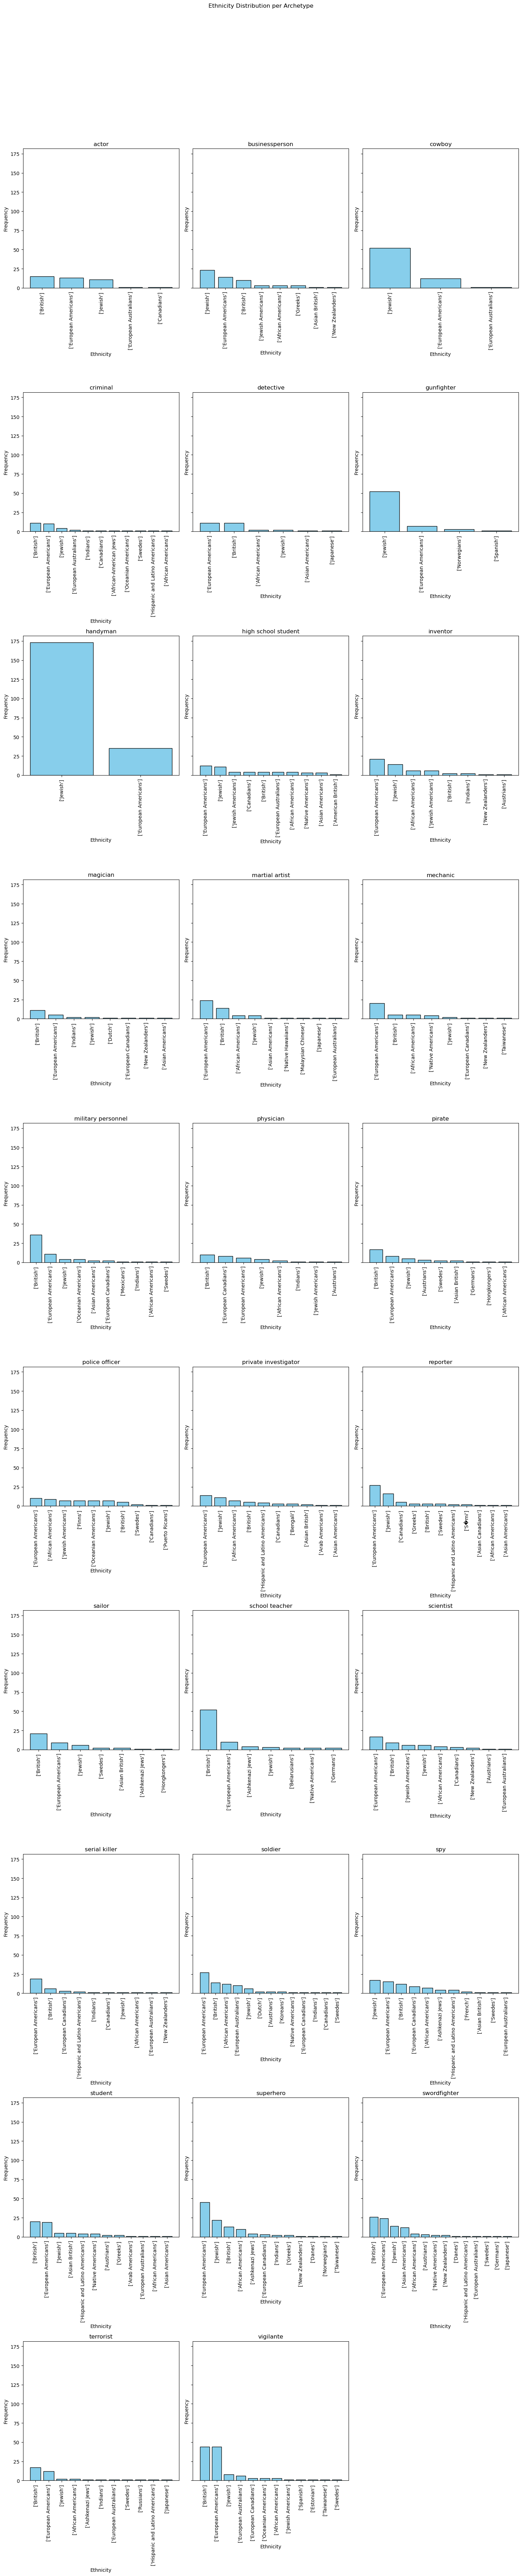

Ethnicity statistics
Chi-square test statistic: 3432.997235684602
p-value: 2.559854449786088e-219
Degrees of freedom: 1176
There is a statistically significant ethnicity bias by archetype (reject null hypothesis).


In [1]:
import src.scripts.archetype_analysis

### 3. Diversity Score

In [6]:
import src.scripts.diversity_score_functions

#### 3.1 creating the diversity dataset
In this section we calculate the diversity scores for each movie, we do this by grouping by movie, and applying formulas (simpson diversity index for age/height/age, one minus absolute difference in proportion in gender, porportions of foreign actor)

In [8]:
df_result_gender = df_metadata_OI.groupby('Freebase Movie ID').apply(calculate_gender_diversity).reset_index()
df_result_gender.columns = ['Freebase Movie ID', 'gender_score']
df_result_gender.head(10)

NameError: name 'df_metadata_OI' is not defined

In [ ]:
df_result_foreigners = calculate_foreign_actor_proportion(df_metadata_OI)
df_result_foreigners.head(10)


In [ ]:
df_result_age = df_metadata_OI.groupby('Freebase Movie ID').apply(calculate_age_diversity).reset_index()
df_result_age.columns = ['Freebase Movie ID', 'age_score']

In [ ]:
df_result_height = df_metadata_OI.groupby('Freebase Movie ID').apply(calculate_height_diversity).reset_index()
df_result_height.columns = ['Freebase Movie ID', 'height_score']


In [ ]:
df_result_ethnicity = df_metadata_OI.groupby('Freebase Movie ID').apply(calculate_ethnicity_diversity).reset_index()
df_result_ethnicity.columns = ['Freebase Movie ID', 'ethnicity_score']

In this section, we create a new data set where each movie posseses a score. Additionally we add for each movie the overall diversity score which is just the mean of the previous scores combined.

In [ ]:
df_merged = df_result_age \
    .merge(df_result_height, on='Freebase Movie ID') \
    .merge(df_result_ethnicity, on='Freebase Movie ID') \
    .merge(df_result_gender, on='Freebase Movie ID')\
    .merge(df_result_foreigners, on='Freebase Movie ID')

df_merged['diversity_score'] = df_merged[['age_score', 'height_score', 'ethnicity_score', 'gender_score','Foreign Actor Proportion']].mean(axis=1)
df_merged.head(10)

In [ ]:
Diversity_movie_metadata=df_merged.merge(
    df_merged_unique[['Freebase Movie ID', 'Movie Release Date', 'Movie Box Office Revenue', 'Movie Language', 'Movie Country']],
    on='Freebase Movie ID',
    how='inner') 
Diversity_movie_metadata.sample(10)

#### 3.2 preliminary analysis of the dataset
In this section, we decided to plot the evolution of the various diversity scores over time and over the different countries

In [ ]:
import plot_diversity_country_time